# 1. Mixture Models

## 1.1 Lab Work

### 1.1.1 Preparatory work and modeling

In [ ]:
# Only run this cell when runing the notebook from Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install spherecluster to estimate von Mises mixture model
!pip install spherecluster
# Install scikit-learn version 0.20.0 specific version so that spherecluster can
# run without a problem
!pip install scikit-learn==0.20.0

#### 2.

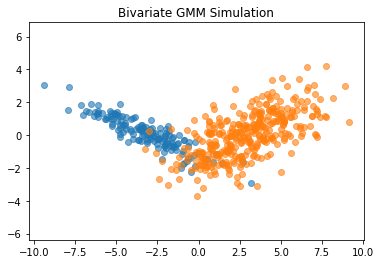

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

mean1 = [-3, 0]
cov1 = [[5, -2], [-2, 1]]
mean2 = [3, 0]
cov2 = [[5, 2], [2, 2]]

x1, y1 = np.random.multivariate_normal(mean1, cov1, int(0.3 * 500)).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, int(0.7 * 500)).T

plt.plot(x1, y1, 'o', alpha=0.6)
plt.plot(x2, y2, 'o', alpha=0.6)
plt.axis('equal')
plt.title('Bivariate GMM Simulation')
plt.show()

#### 3.

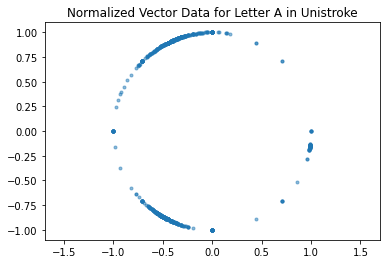

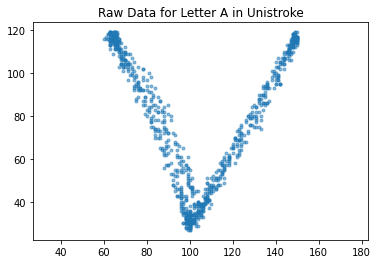

In [ ]:
import os
import math
from sklearn.preprocessing import normalize

files = []
data = []
DX, DY = [], []
X, Y = [], []

# When used locally
path = 'Unistroke'

# When used in Colab
#path = '/content/drive/Shared drives/MOSIG FPDM LABS/Lab 1/Notebooks/Unistroke'

for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and i.startswith('A'):
        files.append(i)

nulls = 0        
for file in files:
    f = open(os.path.join(os.path.join(path,file)), 'r')
    lines = f.read().splitlines()
    for i in range(len(lines) - 1):
        x0, y0 = lines[i].split()
        x1, y1 = lines[i + 1].split()
        x0, y0, x1, y1 = float(x0), float(y0), float(x1), float(y1)
        norm = math.sqrt((x1 - x0)**2 + (y1 - y0)**2)
        if norm == 0:
            nulls += 1
            continue
        dx = (x1 - x0) / norm
        dy = (y1 - y0) / norm
        DX.append(dx)
        DY.append(dy)
        X.append(x1)
        Y.append(y1)

plt.plot(DX, DY, '.', alpha=0.5)
plt.axis('equal')
plt.title('Normalized Vector Data for Letter A in Unistroke')
plt.show()

plt.plot(X, Y, '.', alpha=0.5)
plt.axis('equal')
plt.title('Raw Data for Letter A in Unistroke')
plt.show()

### 1.1.2. Data Analysis: Gaussian Model

#### 1.

In [ ]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=2, covariance_type='full')
data = np.array(list(zip(DX, DY)))
data_original = np.array(list(zip(X, Y)))

gmm.fit(data)

print('Means:\n', gmm.means_, '\n')
print('Covariances:\n', gmm.covariances_)
print('Weights:\n', gmm.weights_)

Means:
 [[-0.48162122 -0.83800013]
 [-0.20488739  0.76291047]] 

Covariances:
 [[[ 0.03313364 -0.0266468 ]
  [-0.0266468   0.03266514]]

 [[ 0.23341245 -0.13776303]
  [-0.13776303  0.14257831]]]
Weights:
 [0.44684544 0.55315456]


In [ ]:
cls = gmm.predict(data)

alpha0 = len(np.where(cls == 0)[0]) / len(cls)
alpha1 = len(np.where(cls == 1)[0]) / len(cls)

print('PDF =', alpha0, '* N1 +', alpha1, '* N2')
print('Where N1 is a multivariate gaussian with mean vector:', gmm.means_[0], 'and covariance matrix:\n', gmm.covariances_[0])
print('and N2 is a multivariate gaussian with mean vector:', gmm.means_[1], 'and covariance matrix:\n', gmm.covariances_[1])

PDF = 0.44730941704035876 * N1 + 0.5526905829596412 * N2
Where N1 is a multivariate gaussian with mean vector: [-0.48162122 -0.83800013] and covariance matrix:
 [[ 0.03313364 -0.0266468 ]
 [-0.0266468   0.03266514]]
and N2 is a multivariate gaussian with mean vector: [-0.20488739  0.76291047] and covariance matrix:
 [[ 0.23341245 -0.13776303]
 [-0.13776303  0.14257831]]


#### 2.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Log scale: values of z <= 0 have been masked
  app.launch_new_instance()


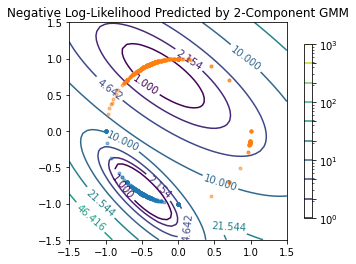

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

DX = np.array(DX)
DY = np.array(DY)

# display predicted scores by the model as a contour plot
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.clabel(CS)
plt.plot(DX[np.where(cls == 0)], DY[np.where(cls == 0)], '.', alpha=0.5)
plt.plot(DX[np.where(cls == 1)], DY[np.where(cls == 1)], '.', alpha=0.5)

plt.title('Negative Log-Likelihood Predicted by 2-Component GMM')
plt.axis('tight')
plt.gca().set_aspect('equal')
plt.show()

#### What happens if you add more components?

In [ ]:
gmm_3 = mixture.GaussianMixture(n_components=3, covariance_type='full')

gmm_3.fit(data)

print('Means:\n', gmm_3.means_, '\n')
print('Covariances:\n', gmm_3.covariances_)
print('Weights:\n', gmm_3.weights_)

cls_3 = gmm_3.predict(data)

alpha0 = len(np.where(cls_3 == 0)[0]) / len(cls_3)
alpha1 = len(np.where(cls_3 == 1)[0]) / len(cls_3)
alpha2 = len(np.where(cls_3 == 2)[0]) / len(cls_3)

print('PDF =', alpha0, '* N1 +', alpha1, '* N2 +', alpha2, '* N3')
print('Where N1 is a multivariate gaussian with mean vector:', gmm_3.means_[0], 'and covariance matrix:\n', gmm_3.covariances_[0])
print('and N2 is a multivariate gaussian with mean vector:', gmm_3.means_[1], 'and covariance matrix:\n', gmm_3.covariances_[1])
print('and N3 is a multivariate gaussian with mean vector:', gmm_3.means_[2], 'and covariance matrix:\n', gmm_3.covariances_[2])

Means:
 [[-0.48466513 -0.8312209 ]
 [-0.367334    0.90125823]
 [ 0.94979391 -0.17268733]] 

Covariances:
 [[[ 0.03438828 -0.02971976]
  [-0.02971976  0.03978524]]

 [[ 0.0443732   0.01649393]
  [ 0.01649393  0.00842814]]

 [[ 0.0112068   0.00899436]
  [ 0.00899436  0.05686582]]]
Weights:
 [0.44967914 0.48081302 0.06950784]
PDF = 0.4495515695067265 * N1 + 0.48094170403587444 * N2 + 0.06950672645739911 * N3
Where N1 is a multivariate gaussian with mean vector: [-0.48466513 -0.8312209 ] and covariance matrix:
 [[ 0.03438828 -0.02971976]
 [-0.02971976  0.03978524]]
and N2 is a multivariate gaussian with mean vector: [-0.367334    0.90125823] and covariance matrix:
 [[0.0443732  0.01649393]
 [0.01649393 0.00842814]]
and N3 is a multivariate gaussian with mean vector: [ 0.94979391 -0.17268733] and covariance matrix:
 [[0.0112068  0.00899436]
 [0.00899436 0.05686582]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Log scale: values of z <= 0 have been masked
  # Remove the CWD from sys.path while we load stuff.


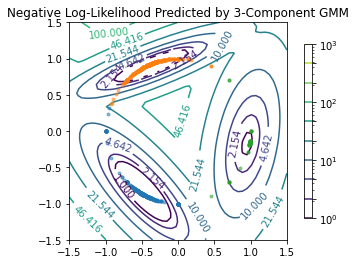

In [ ]:
# display predicted scores by the model as a contour plot
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm_3.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.clabel(CS)
plt.plot(DX[np.where(cls_3 == 0)], DY[np.where(cls_3 == 0)], '.', alpha=0.5)
plt.plot(DX[np.where(cls_3 == 1)], DY[np.where(cls_3 == 1)], '.', alpha=0.5)
plt.plot(DX[np.where(cls_3 == 2)], DY[np.where(cls_3 == 2)], '.', alpha=0.5)

plt.title('Negative Log-Likelihood Predicted by 3-Component GMM')
plt.axis('tight')
plt.gca().set_aspect('equal')
plt.show()

#### 3.

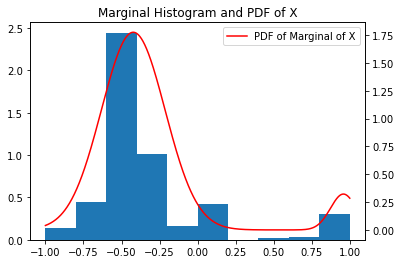

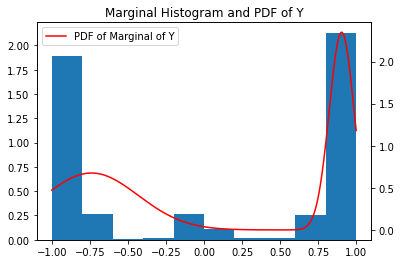

In [ ]:
# Marginal of X
x = np.linspace(np.min(DX), np.max(DX), 1000)
model = mixture.GaussianMixture(2).fit(DX.reshape(-1, 1))
pdf = np.exp(model.score_samples(x.reshape(-1, 1)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(DX, density=True)
ax2.plot(x, pdf, label='PDF of Marginal of X', color='red')
ax2.legend()
plt.title('Marginal Histogram and PDF of X')
plt.show()

# Marginal of Y
y = np.linspace(np.min(DY), np.max(DY), 1000)
model = mixture.GaussianMixture(2).fit(DY.reshape(-1, 1))
pdf = np.exp(model.score_samples(x.reshape(-1, 1)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(DY, density=True)
ax2.plot(y, pdf, label='PDF of Marginal of Y', color='red')
ax2.legend()
plt.title('Marginal Histogram and PDF of Y')
plt.show()


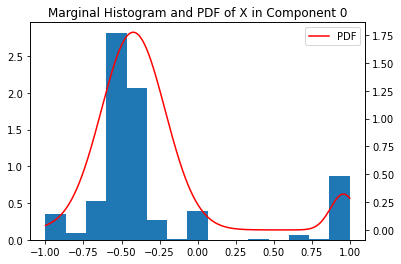

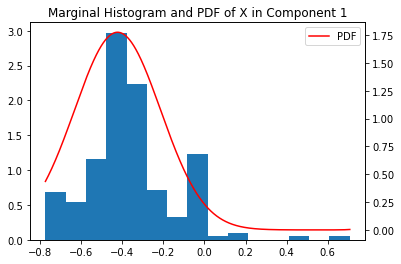

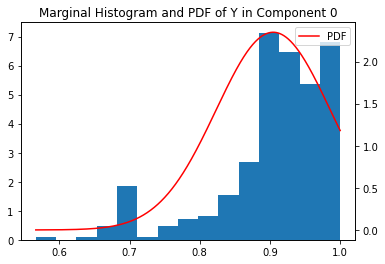

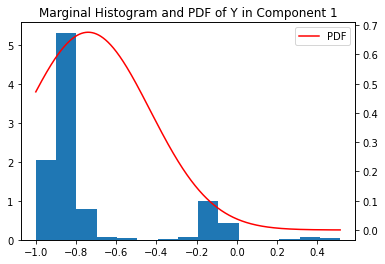

In [ ]:
# Marginal of X
model = mixture.GaussianMixture(2).fit(DX.reshape(-1, 1))
label = model.predict(DY.reshape(-1, 1))

# Component 0
x = np.linspace(np.min(DX[np.where(label == 0)]), np.max(DX[np.where(label == 0)]), 1000)
pdf = np.exp(model.score_samples(x.reshape(-1, 1)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(DX[np.where(label == 0)], bins=15, density=True)
ax2.plot(x, pdf, label='PDF', color='red')
ax2.legend()
plt.title('Marginal Histogram and PDF of X in Component 0')
plt.show()

# Component 1
x = np.linspace(np.min(DX[np.where(label == 1)]), np.max(DX[np.where(label == 1)]), 1000)
pdf = np.exp(model.score_samples(x.reshape(-1, 1)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(DX[np.where(label == 1)], bins=15, density=True)
ax2.plot(x, pdf, label='PDF', color='red')
ax2.legend()
plt.title('Marginal Histogram and PDF of X in Component 1')
plt.show()

# Marginal of Y
model = mixture.GaussianMixture(2).fit(DY.reshape(-1, 1))
label = model.predict(DY.reshape(-1, 1))

# Component 0
y = np.linspace(np.min(DY[np.where(label == 0)]), np.max(DY[np.where(label == 0)]), 1000)
pdf = np.exp(model.score_samples(y.reshape(-1, 1)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(DY[np.where(label == 0)], bins=15, density=True)
ax2.plot(y, pdf, label='PDF', color='red')
ax2.legend()
plt.title('Marginal Histogram and PDF of Y in Component 0')
plt.show()

# Component 1
y = np.linspace(np.min(DY[np.where(label == 1)]), np.max(DY[np.where(label == 1)]), 1000)
pdf = np.exp(model.score_samples(y.reshape(-1, 1)))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.hist(DY[np.where(label == 1)], bins=15, density=True)
ax2.plot(y, pdf, label='PDF', color='red')
ax2.legend()
plt.title('Marginal Histogram and PDF of Y in Component 1')
plt.show()

#### 5.

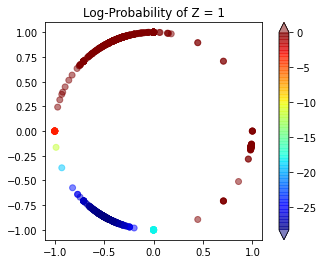

In [ ]:
proba = gmm.predict_proba(data)
plt.scatter(DX, DY, alpha=0.5, c=np.log(proba[:,1]), cmap='jet')
plt.colorbar(shrink=1, extend='both')
plt.axis('tight')
plt.gca().set_aspect('equal')
plt.title('Log-Probability of Z = 1')
plt.show()

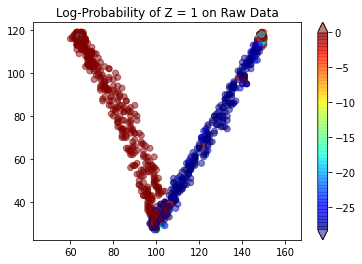

In [ ]:
# Approximate labeling of the original data using a GMM
plt.scatter(data_original[:,0], data_original[:,1], alpha=0.5, c=np.log(proba[:,1]), cmap='jet')
plt.colorbar(shrink=1, extend='both')
plt.axis('equal')
plt.title('Log-Probability of Z = 1 on Raw Data')
plt.show()

### 1.2. Mandatory Additional Questions

#### 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


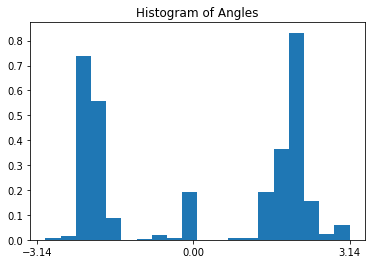

In [ ]:
# Transforming unitary cartesian vectors to angular data {theta} such that:
# -pi <= theta <= pi
accurate_angles = True
data_ang = np.arctan(data[:,1] / data[:,0])

if accurate_angles:
  for i in range(data.shape[0]):
    if data[i,0] < 0:
        data_ang[i] += np.pi
  data_ang[np.where(data_ang < -np.pi)] += 2 * np.pi
  data_ang[np.where(data_ang > np.pi)] -= 2 * np.pi

_, ax = plt.subplots(1)
ax.hist(data_ang, bins=20, density=True)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
plt.title('Histogram of Angles')
plt.show()

#### 5.

Cluster centers:
[[-0.38268515 -0.92387882]
 [-0.3733311   0.92769817]]
Cluster concentrations_: [ 2.7131892  22.05224387]
Cluster weights: [0.52930117 0.47069883]


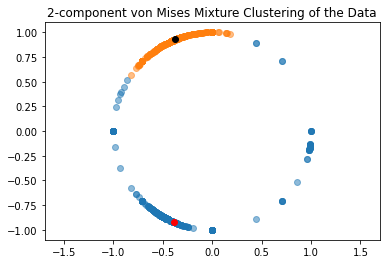

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from spherecluster import VonMisesFisherMixture
# pip package of spherecluster is out of date. Use the fix described in 
# https://github.com/jasonlaska/spherecluster/issues/29

vmf_soft = VonMisesFisherMixture(n_clusters=2, posterior_type='soft')
vmf_soft.fit(data)

print('Cluster centers:')
print(vmf_soft.cluster_centers_)
print('Cluster concentrations_:', vmf_soft.concentrations_)
print('Cluster weights:', vmf_soft.weights_)

data0 = data[np.where(vmf_soft.labels_ == 0)]
data1 = data[np.where(vmf_soft.labels_ == 1)]

plt.scatter(data0[:,0], data0[:,1], alpha=0.5)
plt.scatter(data1[:,0], data1[:,1], alpha=0.5)
plt.plot(vmf_soft.cluster_centers_[0,0], vmf_soft.cluster_centers_[0,1], 'o', c='red')
plt.plot(vmf_soft.cluster_centers_[1,0], vmf_soft.cluster_centers_[1,1], 'o', c='black')
plt.axis('equal')
plt.title('2-component von Mises Mixture Clustering of the Data')
plt.show()

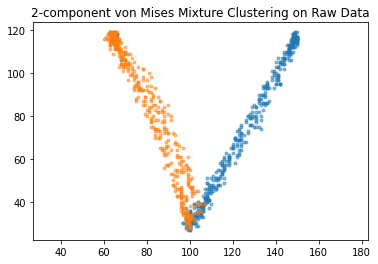

In [ ]:
# Approximate labeling of the original data using a von Mises Mixture
data_original0 = data_original[np.where(vmf_soft.labels_ == 0)]
data_original1 = data_original[np.where(vmf_soft.labels_ == 1)]

plt.plot(data_original0[:,0], data_original0[:,1], '.', alpha=0.5)
plt.plot(data_original1[:,0], data_original1[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title('2-component von Mises Mixture Clustering on Raw Data')
plt.show()

#### More von Mises Mixture Components

Cluster centers:
[[-0.37698728  0.92621844]
 [-0.48701412 -0.8733941 ]
 [ 0.34002864 -0.94041508]]
Cluster concentrations_: [ 23.48323077 120.1322981    0.59290707]
Cluster weights: [0.45626857 0.36596313 0.1777683 ]


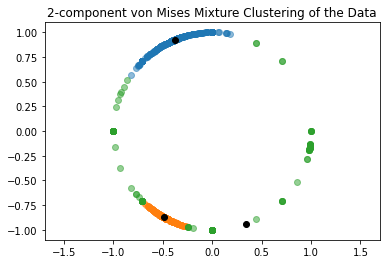

In [ ]:
vmf_soft = VonMisesFisherMixture(n_clusters=3, posterior_type='soft')
vmf_soft.fit(data)

print('Cluster centers:')
print(vmf_soft.cluster_centers_)
print('Cluster concentrations_:', vmf_soft.concentrations_)
print('Cluster weights:', vmf_soft.weights_)

data0 = data[np.where(vmf_soft.labels_ == 0)]
data1 = data[np.where(vmf_soft.labels_ == 1)]
data2 = data[np.where(vmf_soft.labels_ == 2)]

plt.scatter(data0[:,0], data0[:,1], alpha=0.5)
plt.scatter(data1[:,0], data1[:,1], alpha=0.5)
plt.scatter(data2[:,0], data2[:,1], alpha=0.5)
plt.plot(vmf_soft.cluster_centers_[0,0], vmf_soft.cluster_centers_[0,1], 'o', c='black')
plt.plot(vmf_soft.cluster_centers_[1,0], vmf_soft.cluster_centers_[1,1], 'o', c='black')
plt.plot(vmf_soft.cluster_centers_[2,0], vmf_soft.cluster_centers_[2,1], 'o', c='black')

plt.axis('equal')
plt.title('2-component von Mises Mixture Clustering of the Data')
plt.show()

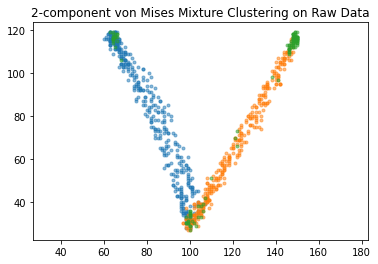

In [ ]:
# Approximate labeling of the original data using a 3-component von Mises Mixture
data_original0 = data_original[np.where(vmf_soft.labels_ == 0)]
data_original1 = data_original[np.where(vmf_soft.labels_ == 1)]
data_original2 = data_original[np.where(vmf_soft.labels_ == 2)]

plt.plot(data_original0[:,0], data_original0[:,1], '.', alpha=0.5)
plt.plot(data_original1[:,0], data_original1[:,1], '.', alpha=0.5)
plt.plot(data_original2[:,0], data_original2[:,1], '.', alpha=0.5)
plt.axis('equal')
plt.title('2-component von Mises Mixture Clustering on Raw Data')
plt.show()